In [1]:
import pandas as pd
import numpy as np

In [2]:
df_exp = pd.read_csv("experimental_microstates.csv")
df_exp


,Microstate ID of A,Microstate ID of HA,Molecule ID,pKa (exp),pKa SEM (exp),pKa ID,Microstate identification source
0,SM07_micro004,SM07_micro006,SM07,6.08,0.01,SM07_pKa1,NMR measurement
1,SM14_micro001,SM14_micro002,SM14,5.30,0.01,SM14_pKa2,NMR measurement
2,SM14_micro002,SM14_micro003,SM14,2.58,0.01,SM14_pKa1,NMR measurement
3,SM02_micro001,SM02_micro004,SM02,5.03,0.01,SM02_pKa1,Estimated based on SM07 NMR measurement
4,SM04_micro003,SM04_micro002,SM04,6.02,0.01,SM04_pKa1,Estimated based on SM07 NMR measurement
5,SM09_micro003,SM09_micro001,SM09,5.37,0.01,SM09_pKa1,Estimated based on SM07 NMR measurement
6,SM12_micro012,SM12_micro006,SM12,5.28,0.01,SM12_pKa1,Estimated based on SM07 NMR measurement
7,SM13_micro005,SM13_micro001,SM13,5.77,0.01,SM13_pKa1,Estimated based on SM07 NMR measurement
8,SM15_micro004,SM15_micro002,SM15,8.94,0.01,SM15_pKa2,Estimated based on SM14 NMR measurement
9,SM15_micro002,SM15_micro003,SM15,4.70,0.01,SM15_pKa1,Estimated based on SM14 NMR measurement


In [3]:
df_col = pd.read_csv("typeI_submission_collection.csv")
df_col.head()

,Unnamed: 0,$\Delta$pKa error (calc - exp),Microstate ID of A,Microstate ID of HA,Molecule ID,name,pKa (calc),pKa (exp),pKa ID,pKa SEM (calc),pKa SEM (exp),participant,receipt_id
0,0,0.15,SM01_micro004,SM01_micro005,SM01,Jaguar,9.68,9.53,SM01_pKa1,0.77,0.01,Bas Rustenburg,nb011
1,1,-0.26,SM02_micro003,SM02_micro005,SM02,Jaguar,4.77,5.03,SM02_pKa1,2.00,0.01,Bas Rustenburg,nb011
2,2,-0.04,SM03_micro002,SM03_micro012,SM03,Jaguar,6.98,7.02,SM03_pKa1,1.62,0.01,Bas Rustenburg,nb011
3,3,-0.81,SM04_micro003,SM04_micro002,SM04,Jaguar,5.21,6.02,SM04_pKa1,2.26,0.01,Bas Rustenburg,nb011
4,4,-0.19,SM05_micro008,SM05_micro011,SM05,Jaguar,4.40,4.59,SM05_pKa1,0.52,0.01,Bas Rustenburg,nb011


In [46]:
df_col[df_col["Molecule ID"] == "SM14"]

,Unnamed: 0,$\Delta$pKa error (calc - exp),Microstate ID of A,Microstate ID of HA,Molecule ID,name,pKa (calc),pKa (exp),pKa ID,pKa SEM (calc),pKa SEM (exp),participant,receipt_id


In [4]:
df_exp_microstates = df_exp.rename(columns={'Microstate ID of A': 'Exp. Microstate ID of A', 'Microstate ID of HA': 'Exp. Microstate ID of HA'})
df_exp_microstates = df_exp_microstates.drop(columns=['Molecule ID', "pKa (exp)", 'pKa SEM (exp)'])
df_exp_microstates

,Exp. Microstate ID of A,Exp. Microstate ID of HA,pKa ID,Microstate identification source
0,SM07_micro004,SM07_micro006,SM07_pKa1,NMR measurement
1,SM14_micro001,SM14_micro002,SM14_pKa2,NMR measurement
2,SM14_micro002,SM14_micro003,SM14_pKa1,NMR measurement
3,SM02_micro001,SM02_micro004,SM02_pKa1,Estimated based on SM07 NMR measurement
4,SM04_micro003,SM04_micro002,SM04_pKa1,Estimated based on SM07 NMR measurement
5,SM09_micro003,SM09_micro001,SM09_pKa1,Estimated based on SM07 NMR measurement
6,SM12_micro012,SM12_micro006,SM12_pKa1,Estimated based on SM07 NMR measurement
7,SM13_micro005,SM13_micro001,SM13_pKa1,Estimated based on SM07 NMR measurement
8,SM15_micro004,SM15_micro002,SM15_pKa2,Estimated based on SM14 NMR measurement
9,SM15_micro002,SM15_micro003,SM15_pKa1,Estimated based on SM14 NMR measurement


1. Add experimental microstates to collection
2. Drop entries of molecules with unknown experimental microstate
3. check for matches and give a score

In [45]:
df_col_ms = pd.merge(df_col, df_exp_microstates, on="pKa ID", how="outer" )
# Drop rows whose "Exp. Microstate ID of A" column has NaN value
df_col_ms = df_col_ms.dropna(subset=["Exp. Microstate ID of A"])
# Drop rows whose "receipt_id" column has NaN value
#df_col_ms = df_col_ms.dropna(subset=["receipt_id"])
df_col_ms = df_col_ms.reset_index()
df_col_ms = df_col_ms.drop(columns=['index'])
df_col_ms.tail()

,Unnamed: 0,$\Delta$pKa error (calc - exp),Microstate ID of A,Microstate ID of HA,Molecule ID,name,pKa (calc),pKa (exp),pKa ID,pKa SEM (calc),pKa SEM (exp),participant,receipt_id,Exp. Microstate ID of A,Exp. Microstate ID of HA,Microstate identification source
265,951.0,0.08,SM15_micro001,SM15_micro003,SM15,EC-RISM/MP2/cc-pVTZ-P3NI-phi-noThiols-2par,9.02,8.94,SM15_pKa2,1.77,0.01,Stefan Kast,4o0ia,SM15_micro004,SM15_micro002,Estimated based on SM14 NMR measurement
266,982.0,0.13,SM15_micro004,SM15_micro002,SM15,"EC-RISM/B3LYP/6-311+G(d,p)-P3NI-phi-noThiols-2par",9.07,8.94,SM15_pKa2,1.77,0.01,Stefan Kast,0xi4b,SM15_micro004,SM15_micro002,Estimated based on SM14 NMR measurement
267,1012.0,-0.60,SM15_micro001,SM15_micro003,SM15,"EC-RISM/MP2/6-311+G(d,p)-P3NI-phi-all-2par",8.34,8.94,SM15_pKa2,1.77,0.01,Stefan Kast,2umai,SM15_micro004,SM15_micro002,Estimated based on SM14 NMR measurement
268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SM14_pKa2,NaN,NaN,NaN,NaN,SM14_micro001,SM14_micro002,NMR measurement
269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SM14_pKa1,NaN,NaN,NaN,NaN,SM14_micro002,SM14_micro003,NMR measurement


In [44]:
df_col_ms[df_col_ms["Molecule ID"] == "SM14"]

,Unnamed: 0,$\Delta$pKa error (calc - exp),Microstate ID of A,Microstate ID of HA,Molecule ID,name,pKa (calc),pKa (exp),pKa ID,pKa SEM (calc),pKa SEM (exp),participant,receipt_id,Exp. Microstate ID of A,Exp. Microstate ID of HA,Microstate identification source


In [24]:
# Add a score column based on microstate ID match

df_col_ms["Microstate pair match"] = None

for i, row in enumerate(df_col_ms.iterrows()):
    pred_ms_A = row[1]["Microstate ID of A"]
    pred_ms_HA = row[1]["Microstate ID of HA"]
    print("{} and {}".format(exp_ms_A, exp_ms_HA))
    pred_ms_pair = str(pred_ms_A) + " " + str(pred_ms_HA)
    
    exp_ms_A = row[1]["Exp. Microstate ID of A"]
    exp_ms_HA = row[1]["Exp. Microstate ID of HA"]
    exp_ms_pair = str(exp_ms_A) + " " + str(exp_ms_HA)
    
    if pred_ms_pair == exp_ms_pair:
        df_col_ms.loc[i,"Microstate pair match"] = 1
        print(pred_ms_pair )
        print(exp_ms_pair)
        print("1")
    else:
        df_col_ms.loc[i,"Microstate pair match"] = 0    
        print(pred_ms_pair )
        print(exp_ms_pair)
        print("0")
               

SM14_micro002 and SM14_micro003
SM02_micro003 SM02_micro005
SM02_micro001 SM02_micro004
0
SM02_micro001 and SM02_micro004
SM02_micro003 SM02_micro005
SM02_micro001 SM02_micro004
0
SM02_micro001 and SM02_micro004
SM02_micro003 SM02_micro005
SM02_micro001 SM02_micro004
0
SM02_micro001 and SM02_micro004
SM02_micro003 SM02_micro005
SM02_micro001 SM02_micro004
0
SM02_micro001 and SM02_micro004
SM02_micro003 SM02_micro005
SM02_micro001 SM02_micro004
0
SM02_micro001 and SM02_micro004
SM02_micro002 SM02_micro004
SM02_micro001 SM02_micro004
0
SM02_micro001 and SM02_micro004
SM02_micro002 SM02_micro004
SM02_micro001 SM02_micro004
0
SM02_micro001 and SM02_micro004
SM02_micro002 SM02_micro004
SM02_micro001 SM02_micro004
0
SM02_micro001 and SM02_micro004
SM02_micro003 SM02_micro005
SM02_micro001 SM02_micro004
0
SM02_micro001 and SM02_micro004
SM02_micro002 SM02_micro005
SM02_micro001 SM02_micro004
0
SM02_micro001 and SM02_micro004
SM02_micro003 SM02_micro005
SM02_micro001 SM02_micro004
0
SM02_micro

SM15_micro002 SM15_micro003
SM15_micro002 SM15_micro003
1
SM15_micro002 and SM15_micro003
SM15_micro004 SM15_micro001
SM15_micro002 SM15_micro003
0
SM15_micro002 and SM15_micro003
SM15_micro002 SM15_micro003
SM15_micro002 SM15_micro003
1
SM15_micro002 and SM15_micro003
SM15_micro004 SM15_micro001
SM15_micro002 SM15_micro003
0
SM15_micro002 and SM15_micro003
SM15_micro004 SM15_micro001
SM15_micro002 SM15_micro003
0
SM15_micro002 and SM15_micro003
SM15_micro004 SM15_micro001
SM15_micro002 SM15_micro003
0
SM15_micro002 and SM15_micro003
SM15_micro004 SM15_micro001
SM15_micro002 SM15_micro003
0
SM15_micro002 and SM15_micro003
SM15_micro004 SM15_micro001
SM15_micro002 SM15_micro003
0
SM15_micro002 and SM15_micro003
SM15_micro004 SM15_micro001
SM15_micro002 SM15_micro003
0
SM15_micro002 and SM15_micro003
SM15_micro002 SM15_micro003
SM15_micro002 SM15_micro003
1
SM15_micro002 and SM15_micro003
SM15_micro004 SM15_micro001
SM15_micro002 SM15_micro003
0
SM15_micro002 and SM15_micro003
SM15_micro

In [25]:
df_col_ms.head()

,Unnamed: 0,$\Delta$pKa error (calc - exp),Microstate ID of A,Microstate ID of HA,Molecule ID,name,pKa (calc),pKa (exp),pKa ID,pKa SEM (calc),pKa SEM (exp),participant,receipt_id,Exp. Microstate ID of A,Exp. Microstate ID of HA,Microstate identification source,Microstate pair match
0,1.0,-0.26,SM02_micro003,SM02_micro005,SM02,Jaguar,4.77,5.03,SM02_pKa1,2.00,0.01,Bas Rustenburg,nb011,SM02_micro001,SM02_micro004,Estimated based on SM07 NMR measurement,0
1,32.0,-0.60,SM02_micro003,SM02_micro005,SM02,"EC-RISM/MP2/6-311+G(d,p)-P2-phi-all-1par",4.43,5.03,SM02_pKa1,1.77,0.01,Stefan Kast,z7fhp,SM02_micro001,SM02_micro004,Estimated based on SM07 NMR measurement,0
2,63.0,-1.21,SM02_micro003,SM02_micro005,SM02,Adiabatic scheme for type I submission,3.82,5.03,SM02_pKa1,NaN,0.01,Qiao Zeng,wcvnu,SM02_micro001,SM02_micro004,Estimated based on SM07 NMR measurement,0
3,93.0,-0.38,SM02_micro003,SM02_micro005,SM02,EC-RISM/MP2/cc-pVTZ-P2-phi-all-2par,4.65,5.03,SM02_pKa1,1.77,0.01,Stefan Kast,xnoe0,SM02_micro001,SM02_micro004,Estimated based on SM07 NMR measurement,0
4,123.0,-0.75,SM02_micro003,SM02_micro005,SM02,Adiabatic scheme with single point correction ...,4.28,5.03,SM02_pKa1,NaN,0.01,Qiao Zeng,ko8yx,SM02_micro001,SM02_micro004,Estimated based on SM07 NMR measurement,0


In [29]:
submission_IDs = list(set(df_col_ms["receipt_id"].values))
#submission_IDs = list(set(df_col_ms["receipt_id"].to_list()))

submission_IDs 

['8toyp',
 '2umai',
 'nb016',
 'nb011',
 'v8qph',
 'nb008',
 'z7fhp',
 'hgn83',
 'wcvnu',
 'wuuvc',
 'ccpmw',
 'hdiyq',
 'w4z0e',
 '758j8',
 'wexjs',
 'xnoe0',
 'kxztt',
 'ftc8w',
 '0xi4b',
 't8ewk',
 'cm2yq',
 'ktpj5',
 'eyetm',
 'arcko',
 'ko8yx',
 'epvmk',
 '0wfzo',
 'gdqeg',
 'cywyk',
 'qsicn',
 'z3btx',
 'y4wws',
 '4o0ia',
 'nxaaw',
 '6tvf8']

In [30]:
microstate_pair_relative_accuracy = []
number_of_known_microstate_pairs = 10

for submission_ID in submission_IDs:
    # Take subset of df_col_ms based on submission ID
    df_submission = df_col_ms[df_col_ms["receipt_id"] == submission_ID]
    # Count how many times "Microstate pair match" column has value 1
    pair_match = df_submission["Microstate pair match"].values
    relative_accuracy = (np.sum(pair_match)/number_of_known_microstate_pairs)*100
    print("Relative accuracy of {}:".format(submission_ID), relative_accuracy)
    microstate_pair_relative_accuracy.append(relative_accuracy)
   
microstate_pair_relative_accuracy

Relative accuracy of 8toyp: 20.0
Relative accuracy of 2umai: 20.0
Relative accuracy of nb016: 40.0
Relative accuracy of nb011: 50.0
Relative accuracy of v8qph: 40.0
Relative accuracy of nb008: 10.0
Relative accuracy of z7fhp: 30.0
Relative accuracy of hgn83: 0.0
Relative accuracy of wcvnu: 50.0
Relative accuracy of wuuvc: 40.0
Relative accuracy of ccpmw: 50.0
Relative accuracy of hdiyq: 50.0
Relative accuracy of w4z0e: 30.0
Relative accuracy of 758j8: 0.0
Relative accuracy of wexjs: 60.0
Relative accuracy of xnoe0: 30.0
Relative accuracy of kxztt: 30.0
Relative accuracy of ftc8w: 30.0
Relative accuracy of 0xi4b: 50.0
Relative accuracy of t8ewk: 40.0
Relative accuracy of cm2yq: 20.0
Relative accuracy of ktpj5: 40.0
Relative accuracy of eyetm: 40.0
Relative accuracy of arcko: 40.0
Relative accuracy of ko8yx: 40.0
Relative accuracy of epvmk: 20.0
Relative accuracy of 0wfzo: 20.0
Relative accuracy of gdqeg: 0.0
Relative accuracy of cywyk: 40.0
Relative accuracy of qsicn: 10.0
Relative accu

[20.0,
 20.0,
 40.0,
 50.0,
 40.0,
 10.0,
 30.0,
 0.0,
 50.0,
 40.0,
 50.0,
 50.0,
 30.0,
 0.0,
 60.0,
 30.0,
 30.0,
 30.0,
 50.0,
 40.0,
 20.0,
 40.0,
 40.0,
 40.0,
 40.0,
 20.0,
 20.0,
 0.0,
 40.0,
 10.0,
 20.0,
 30.0,
 10.0,
 50.0,
 30.0]

In [31]:
data = {'Submission ID': submission_IDs, 'Relative accuracy of microstate pairs(%)': microstate_pair_relative_accuracy}
df_rel_acc = pd.DataFrame.from_dict(data)

df_rel_acc = df_rel_acc.sort_values(by="Relative accuracy of microstate pairs(%)", ascending=False) #.reset_index(inplace=True)
df_rel_acc

,Submission ID,Relative accuracy of microstate pairs(%)
14,wexjs,60.0
3,nb011,50.0
33,nxaaw,50.0
8,wcvnu,50.0
18,0xi4b,50.0
10,ccpmw,50.0
11,hdiyq,50.0
9,wuuvc,40.0
24,ko8yx,40.0
21,ktpj5,40.0


In [32]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"] = [4,4]

In [33]:
def barplot(df, x_label, y_label, title):
    """Creates bar plot of a given dataframe.

    Args:
        df: Pandas Dataframe that should have columns with columnnames specified in other arguments.
        x_label: str, column name of x axis categories
        y_label: str, column name of y axis values
        title: str, the title of the plot

    """
    # Plot style
    plt.close()
    plt.style.use(["seaborn-talk", "seaborn-whitegrid"])
    plt.rcParams['axes.labelsize'] = 18
    plt.rcParams['xtick.labelsize'] = 14
    plt.rcParams['ytick.labelsize'] = 16
    plt.ylim(0,100)
    #plt.tight_layout()

    # Plot
    data = df
    x = range(len(data[y_label]))
    y = data[y_label]
    plt.bar(x, y)
    plt.xticks(x, data[x_label], rotation=90)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if len(title) > 70:
        plt.title(title[:70]+"...")
    else:
        plt.title(title)
    plt.tight_layout()

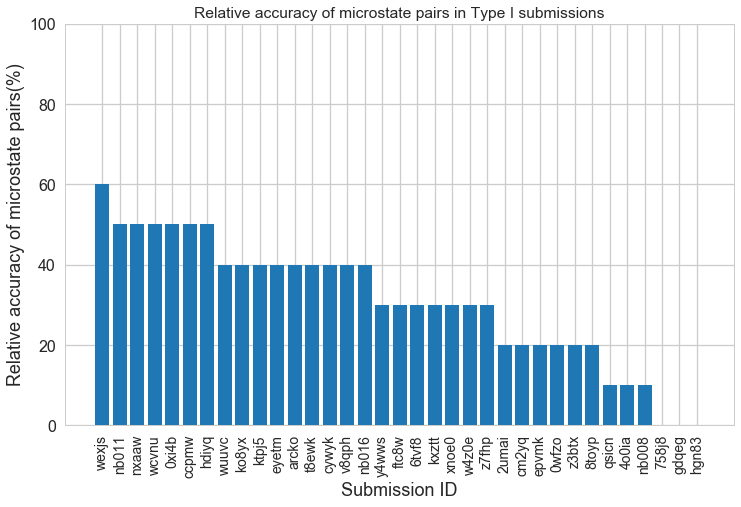

In [34]:
barplot(df = df_rel_acc, 
        x_label = "Submission ID", 
        y_label = "Relative accuracy of microstate pairs(%)", 
        title = "Relative accuracy of microstate pairs in Type I submissions" )
plt.savefig("TypeI_microstate_pair_relative_accuracy.pdf")

## Analyze relative microstate pair accuracy for each molecule

In [36]:
df_col_ms.head()

,Unnamed: 0,$\Delta$pKa error (calc - exp),Microstate ID of A,Microstate ID of HA,Molecule ID,name,pKa (calc),pKa (exp),pKa ID,pKa SEM (calc),pKa SEM (exp),participant,receipt_id,Exp. Microstate ID of A,Exp. Microstate ID of HA,Microstate identification source,Microstate pair match
0,1.0,-0.26,SM02_micro003,SM02_micro005,SM02,Jaguar,4.77,5.03,SM02_pKa1,2.00,0.01,Bas Rustenburg,nb011,SM02_micro001,SM02_micro004,Estimated based on SM07 NMR measurement,0
1,32.0,-0.60,SM02_micro003,SM02_micro005,SM02,"EC-RISM/MP2/6-311+G(d,p)-P2-phi-all-1par",4.43,5.03,SM02_pKa1,1.77,0.01,Stefan Kast,z7fhp,SM02_micro001,SM02_micro004,Estimated based on SM07 NMR measurement,0
2,63.0,-1.21,SM02_micro003,SM02_micro005,SM02,Adiabatic scheme for type I submission,3.82,5.03,SM02_pKa1,NaN,0.01,Qiao Zeng,wcvnu,SM02_micro001,SM02_micro004,Estimated based on SM07 NMR measurement,0
3,93.0,-0.38,SM02_micro003,SM02_micro005,SM02,EC-RISM/MP2/cc-pVTZ-P2-phi-all-2par,4.65,5.03,SM02_pKa1,1.77,0.01,Stefan Kast,xnoe0,SM02_micro001,SM02_micro004,Estimated based on SM07 NMR measurement,0
4,123.0,-0.75,SM02_micro003,SM02_micro005,SM02,Adiabatic scheme with single point correction ...,4.28,5.03,SM02_pKa1,NaN,0.01,Qiao Zeng,ko8yx,SM02_micro001,SM02_micro004,Estimated based on SM07 NMR measurement,0


In [37]:
mol_IDs = list(set(df_col_ms["Molecule ID"].values))
mol_IDs

['SM09', 'SM02', 'SM15', 'SM04', 'SM12', 'SM13', 'SM07']